In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import  PolynomialFeatures
dataset = pd.read_csv("Beijing Air Quality0.csv",encoding='GBK')
raw_dataset=dataset.to_numpy()

AQI=raw_dataset[:,[1]]
Train=raw_dataset[:,1:]
scaleY=MinMaxScaler()
scaleY.fit(Train)
Train=scaleY.transform(Train)

In [2]:
sample=np.empty([2999,21])
for i in range(2999):
    sample[i,0:7]=Train[i,:]
    sample[i,7:14]=Train[i+1,:]
    sample[i,14:21]=Train[i+2,:]
polynomial_features = PolynomialFeatures(1,include_bias=False)
sample=polynomial_features.fit_transform(sample)
print(sample.shape)
from sklearn.model_selection import train_test_split
train_data,test_data,train_AQI,test_AQI=train_test_split(sample,AQI[3:3002,:],test_size=0.2,random_state=0)

(2999, 21)


In [3]:
scaleX,scaleY=MinMaxScaler(),MinMaxScaler()
scaleX.fit(train_data)
scaleY.fit(test_data)
train_data=scaleX.transform(train_data)
test_data=scaleY.transform(test_data)

train_data=train_data.astype('float32')
test_data=test_data.astype('float32')
train_AQI=train_AQI.astype('float32')
test_AQI=test_AQI.astype('float32')

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
def create_model():
    model = Sequential()
    model.add(Dense(8, input_shape=train_data.shape[1:], activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])
    return model
model = KerasClassifier(build_fn=create_model, verbose=0)
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(train_data, train_AQI)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



<ipython-input-4-b9548afcd4b1>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.000833 using {'batch_size': 5, 'epochs': 50}
0.000833 (0.001021) with: {'batch_size': 5, 'epochs': 50}
0.000833 (0.001021) with: {'batch_size': 5, 'epochs': 100}
0.000833 (0.001021) with: {'batch_size': 5, 'epochs': 150}
0.000833 (0.001021) with: {'batch_size': 10, 'epochs': 50}
0.000833 (0.001021) with: {'batch_size': 10, 'epochs': 100}
0.000833 (0.001021) with: {'batch_size': 10, 'epochs': 150}
0.000833 (0.001021) with: {'batch_size': 20, 'epochs': 50}
0.000833 (0.001021) with: {'batch_size': 20, 'epochs': 100}
0.000833 (0.001021) with: {'batch_size': 20, 'epochs': 150}


In [15]:
model = Sequential()
model.add(Dense(8, input_shape=train_data.shape[1:], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])
history=model.fit(train_data,train_AQI, batch_size=5,epochs=50, validation_split=0.3)

Epoch 1/50
336/336 [==============================] - 1s 2ms/step - loss: 10385.8984 - accuracy: 0.0000e+00 - val_loss: 8849.8545 - val_accuracy: 0.0000e+00
Epoch 2/50
336/336 [==============================] - 0s 1ms/step - loss: 5306.9888 - accuracy: 0.0000e+00 - val_loss: 3834.8464 - val_accuracy: 0.0000e+00
Epoch 3/50
336/336 [==============================] - 1s 2ms/step - loss: 3210.8445 - accuracy: 0.0000e+00 - val_loss: 3263.5725 - val_accuracy: 0.0000e+00
Epoch 4/50
336/336 [==============================] - 1s 2ms/step - loss: 3077.0510 - accuracy: 0.0000e+00 - val_loss: 3135.4612 - val_accuracy: 0.0000e+00
Epoch 5/50
336/336 [==============================] - 0s 1ms/step - loss: 2977.4900 - accuracy: 0.0000e+00 - val_loss: 3011.8257 - val_accuracy: 0.0000e+00
Epoch 6/50
336/336 [==============================] - 1s 2ms/step - loss: 2883.4731 - accuracy: 0.0000e+00 - val_loss: 2924.6450 - val_accuracy: 0.0000e+00
Epoch 7/50
336/336 [==============================] - 1s 2ms/st

In [16]:
Prediction=model.predict(test_data)
model.evaluate(test_data,test_AQI)
print(Prediction)

19/19 [==============================] - 0s 3ms/step - loss: 2239.0469 - accuracy: 0.0000e+00
[[ 91.05298 ]
 [ 65.147194]
 [ 75.142   ]
 [186.75285 ]
 [117.365326]
 [107.67929 ]
 [166.66083 ]
 [ 73.31091 ]
 [176.91261 ]
 [ 68.33835 ]
 [ 93.040306]
 [ 61.680264]
 [ 54.1176  ]
 [ 50.743824]
 [119.55231 ]
 [ 72.68969 ]
 [134.89923 ]
 [ 44.615585]
 [ 54.576775]
 [202.61058 ]
 [164.58905 ]
 [ 52.133125]
 [173.02557 ]
 [ 82.44771 ]
 [147.09418 ]
 [ 97.445984]
 [246.96408 ]
 [ 54.13137 ]
 [110.88167 ]
 [140.55309 ]
 [ 97.99921 ]
 [135.37439 ]
 [137.24954 ]
 [ 60.457024]
 [ 49.084724]
 [122.173676]
 [ 70.84566 ]
 [131.98824 ]
 [146.48466 ]
 [191.08438 ]
 [276.45758 ]
 [ 73.118195]
 [ 81.715   ]
 [ 52.585403]
 [ 73.51155 ]
 [ 48.549812]
 [205.6536  ]
 [ 83.37909 ]
 [ 45.465958]
 [ 77.476906]
 [112.73227 ]
 [187.60196 ]
 [ 84.98234 ]
 [133.86084 ]
 [ 82.10452 ]
 [ 62.563393]
 [370.8898  ]
 [152.78285 ]
 [ 79.414055]
 [ 74.952545]
 [ 80.71512 ]
 [120.439545]
 [140.3266  ]
 [150.89378 ]
 [116.6846

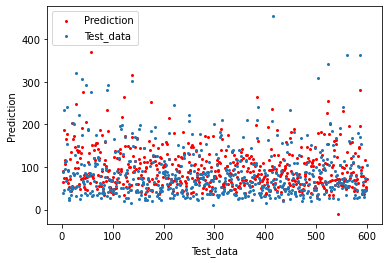

In [17]:
X=np.linspace(1,600,num=600).reshape(-1,1)
plt.scatter(X,Prediction,color='red',s=4, )
plt.scatter(X,test_AQI,s=4)
plt.ylabel('Prediction')
plt.xlabel('Test_data')
plt.legend(['Prediction', 'Test_data'], loc='upper left')

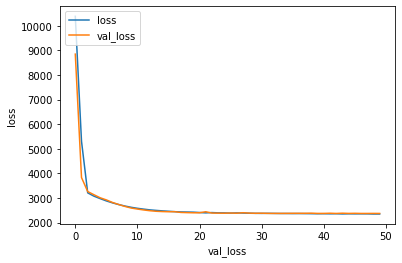

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['loss', 'val_loss'], loc='upper left')

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_AQI, Prediction))
print('Mean Squared Error:', metrics.mean_squared_error(test_AQI, Prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_AQI, Prediction)))

Mean Absolute Error: 32.68645
Mean Squared Error: 2239.0466
Root Mean Squared Error: 47.318565


     Actual   Predicted
0      89.0   91.052979
1      38.0   65.147194
2      47.0   75.141998
3     233.0  186.752853
4      95.0  117.365326
..      ...         ...
595    73.0   66.031174
596    43.0  117.274719
597    47.0   47.779156
598    45.0   53.799816
599   104.0   72.380096

[600 rows x 2 columns]


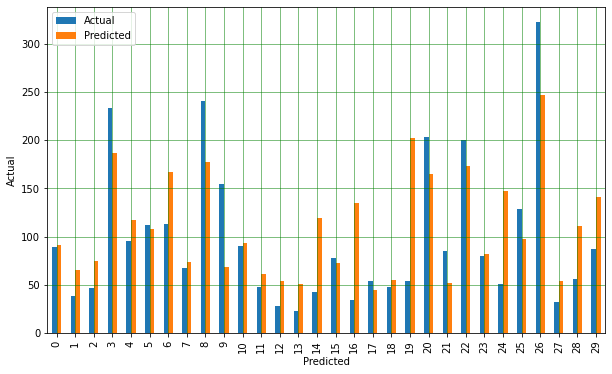

In [20]:
a = np.array(test_AQI)
df_temp = pd.DataFrame({'Actual': a.flatten(), 'Predicted': Prediction.flatten()})
df_temp.head()
print(df_temp)
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

(DummyBaseline)mean_squared_error: 3652.465160922402
(DummyBaseline)mean_absolute_error: 43.97795358649788
(DummyBaseline)Root Mean Squared Error: 60.43562824131476


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

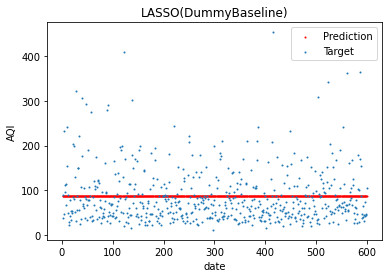

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
meanAQI=sum(AQI)/len(AQI)
X=np.linspace(1,600,num=600).reshape(-1,1)
Dummy=[]
for i in range(0,600):
    Dummy.append(meanAQI)
print('(DummyBaseline)mean_squared_error:',mean_squared_error(test_AQI,Dummy))
print('(DummyBaseline)mean_absolute_error:',mean_absolute_error(test_AQI,Dummy))
print('(DummyBaseline)Root Mean Squared Error:', np.sqrt(mean_squared_error(test_AQI,Dummy)))
plt.title('LASSO(DummyBaseline)')
plt.xlabel('date')
plt.ylabel('AQI')
plt.scatter(X,Dummy,color='red',s=1)
plt.scatter(X,test_AQI,s=1)
plt.legend(['Prediction','Target'],loc='upper right')